In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Grab Data
df = pd.read_excel("https://raw.githubusercontent.com/youronlydimwit/Data_ScienceUse_Cases/main/Classification/Data/HRD_Survey_50.xlsx")
df.head()

,Role Satisfaction,Skill Utilization,Career Growth Opportunity,Supervisor Support,Work-Life Balance,Recognition & Appreciation,Company Culture,Training & Development,Communication Effectiveness,Diversity & Inclusion,Work Environment,Compensation,Staff_Id,Month_Of_Service,Years_Of_Service,Residence,Residence_Code,Net_Salary,Resigned
0,3,4,5,2,2,3,3,3,2,3,4,4,SA63171,1,0,Depok,4,5582218,0
1,2,3,1,2,4,3,4,3,2,2,2,4,SP10211,43,3,Jakarta,1,9213443,0
2,3,3,2,2,2,5,4,4,3,2,4,5,SA79627,10,0,Bekasi,3,5836455,0
3,3,3,4,4,3,1,4,4,4,5,3,5,SA02310,17,1,Depok,4,6035466,0
4,3,2,4,3,3,2,3,4,2,3,2,3,SA98565,17,1,Jakarta,1,5568101,0


In [3]:
# Making a copy of df, but with only numerical information
# Removing unnecessary columns
pred_df = df.drop(columns=['Staff_Id','Residence'])
pred_df.head()

,Role Satisfaction,Skill Utilization,Career Growth Opportunity,Supervisor Support,Work-Life Balance,Recognition & Appreciation,Company Culture,Training & Development,Communication Effectiveness,Diversity & Inclusion,Work Environment,Compensation,Month_Of_Service,Years_Of_Service,Residence_Code,Net_Salary,Resigned
0,3,4,5,2,2,3,3,3,2,3,4,4,1,0,4,5582218,0
1,2,3,1,2,4,3,4,3,2,2,2,4,43,3,1,9213443,0
2,3,3,2,2,2,5,4,4,3,2,4,5,10,0,3,5836455,0
3,3,3,4,4,3,1,4,4,4,5,3,5,17,1,4,6035466,0
4,3,2,4,3,3,2,3,4,2,3,2,3,17,1,1,5568101,0


In [4]:
pred_df = pred_df.drop(columns=["Years_Of_Service"])
pred_df.dtypes

Role Satisfaction              int64
Skill Utilization              int64
Career Growth Opportunity      int64
Supervisor Support             int64
Work-Life Balance              int64
Recognition & Appreciation     int64
Company Culture                int64
Training & Development         int64
Communication Effectiveness    int64
Diversity & Inclusion          int64
Work Environment               int64
Compensation                   int64
Month_Of_Service               int64
Residence_Code                 int64
Net_Salary                     int64
Resigned                       int64
dtype: object

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [7]:
# Split the data into features (X) and labels (y)
X = pred_df.drop(columns=['Resigned'])
y = pred_df['Resigned']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary to store results
results = {'Model': [], 'F1_score': [], 'Accuracy': [], 'Precision': [], 'Recall': []}

# Norm

In [8]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Evaluate models
models = {"Random Forest": rf_model, "Decision Tree": dt_model, "Logistic Regression": lr_model}
metrics = {"Accuracy": accuracy_score, "Precision": precision_score, "Recall": recall_score, "F1 Score": f1_score}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    result = {}
    for metric_name, metric_func in metrics.items():
        result[metric_name] = metric_func(y_test, y_pred)
    results[name] = result

# Convert results to DataFrame for easier plotting
results_df = pd.DataFrame(results)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
results_df

,Random Forest,Decision Tree,Logistic Regression
Accuracy,0.87,0.820000,0.87
Precision,0.00,0.272727,0.00
Recall,0.00,0.230769,0.00
F1 Score,0.00,0.250000,0.00


In [10]:
from imblearn.over_sampling import SMOTE

# SMOTE

In [11]:
# Apply SMOTE to oversample the minority class in the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [12]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

# Evaluate models
models = {"Random Forest": rf_model, "Decision Tree": dt_model, "Logistic Regression": lr_model}
metrics = {"Accuracy": accuracy_score, "Precision": precision_score, "Recall": recall_score, "F1 Score": f1_score}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    result = {}
    for metric_name, metric_func in metrics.items():
        result[metric_name] = metric_func(y_test, y_pred)
    results[name] = result

# Convert results to DataFrame for easier plotting
results_df_resampled = pd.DataFrame(results)

results_df_resampled

,Random Forest,Decision Tree,Logistic Regression
Accuracy,0.83,0.720000,0.130000
Precision,0.00,0.105263,0.130000
Recall,0.00,0.153846,1.000000
F1 Score,0.00,0.125000,0.230088


# OVERSAMPLER

In [13]:
from imblearn.over_sampling import RandomOverSampler

In [14]:
# Apply Random Oversampling to balance the training data
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [15]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

# Evaluate models
models = {"Random Forest": rf_model, "Decision Tree": dt_model, "Logistic Regression": lr_model}
metrics = {"Accuracy": accuracy_score, "Precision": precision_score, "Recall": recall_score, "F1 Score": f1_score}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    result = {}
    for metric_name, metric_func in metrics.items():
        result[metric_name] = metric_func(y_test, y_pred)
    results[name] = result

# Convert results to DataFrame for easier plotting
results_df_resampled = pd.DataFrame(results)

results_df_resampled

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Random Forest,Decision Tree,Logistic Regression
Accuracy,0.87,0.78,0.130000
Precision,0.00,0.00,0.130000
Recall,0.00,0.00,1.000000
F1 Score,0.00,0.00,0.230088


# CLASS WEIGHTS - NORM

In [17]:
# Define class weights
class_weights = {0: 1, 1: 9}

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight=class_weights)
rf_model.fit(X_train, y_train)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, class_weight=class_weights)
dt_model.fit(X_train, y_train)

# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42, class_weight=class_weights)
lr_model.fit(X_train, y_train)

# Evaluate models
models = {"Random Forest": rf_model, "Decision Tree": dt_model, "Logistic Regression": lr_model}
metrics = {"Accuracy": accuracy_score, "Precision": precision_score, "Recall": recall_score, "F1 Score": f1_score}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    result = {}
    for metric_name, metric_func in metrics.items():
        result[metric_name] = metric_func(y_test, y_pred)
    results[name] = result

# Convert results to DataFrame for easier plotting
results_df_resampled = pd.DataFrame(results)

results_df_resampled

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Random Forest,Decision Tree,Logistic Regression
Accuracy,0.87,0.800000,0.87
Precision,0.00,0.111111,0.00
Recall,0.00,0.076923,0.00
F1 Score,0.00,0.090909,0.00


# UNDERSAMPLER

In [20]:
from imblearn.under_sampling import RandomUnderSampler

In [21]:
# Apply Random Oversampling to balance the training data
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

In [22]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

# Evaluate models
models = {"Random Forest": rf_model, "Decision Tree": dt_model, "Logistic Regression": lr_model}
metrics = {"Accuracy": accuracy_score, "Precision": precision_score, "Recall": recall_score, "F1 Score": f1_score}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    result = {}
    for metric_name, metric_func in metrics.items():
        result[metric_name] = metric_func(y_test, y_pred)
    results[name] = result

# Convert results to DataFrame for easier plotting
results_df_resampled = pd.DataFrame(results)

results_df_resampled

,Random Forest,Decision Tree,Logistic Regression
Accuracy,0.560000,0.490000,0.130000
Precision,0.155556,0.183333,0.130000
Recall,0.538462,0.846154,1.000000
F1 Score,0.241379,0.301370,0.230088


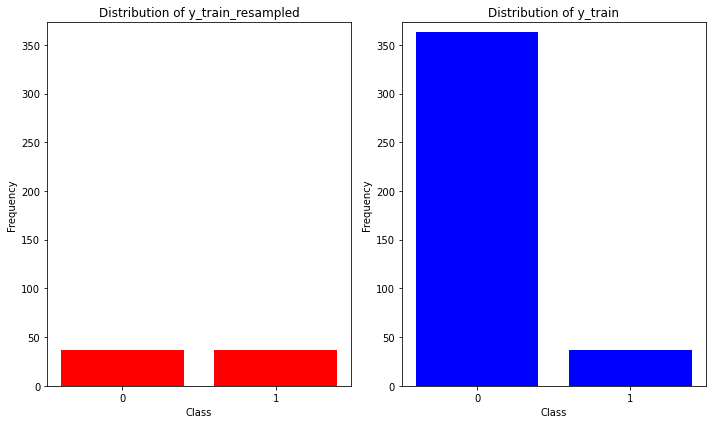

In [31]:
# Calculate class frequencies for y_train_resampled and y_train
unique_train_resampled, counts_train_resampled = np.unique(y_train_resampled, return_counts=True)
unique_train, counts_train = np.unique(y_train, return_counts=True)

# Plot bar plots
plt.figure(figsize=(10, 6))

# Plot for y_train_resampled
plt.subplot(1, 2, 1)
plt.bar(unique_train_resampled, counts_train_resampled, color='red')
plt.title('Distribution of y_train_resampled')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(unique_train_resampled)
plt.ylim(0, max(max(counts_train_resampled), max(counts_train)) + 10)

# Plot for y_train
plt.subplot(1, 2, 2)
plt.bar(unique_train, counts_train, color='blue')
plt.title('Distribution of y_train')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(unique_train)
plt.ylim(0, max(max(counts_train_resampled), max(counts_train)) + 10)

plt.tight_layout()
plt.show()